Importing pandas library

In [2]:
import pandas as pd

Loading the training set and test one to work with them

In [3]:
labeled_train=pd.read_csv('labeled_train_set.csv')
unlabeled_train=pd.read_csv('unlabeled_train_set.csv')

test=pd.read_csv('test_set.csv')

Loading the head of data to see what we have to have a challenge with

In [4]:
print(labeled_train.head())
print(unlabeled_train.head())

print(test.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      3    0    0    0    0    0    0    0    0    0  ...      0      0   
4      8    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0   

Overall view on data columns to see if there is a problem or not. In other words we can say evaluating preproccessing requirement by checking availability of null or missing data and also categorial ones which Machine learning models can't work with and handle them.

In [5]:
print(labeled_train.info())
print(unlabeled_train.info())

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 107.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, 1x1 to 28x28
dtypes: int64(784)
memory usage: 251.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None


More precise and apparent calculation and preview of the number of missing values in each column ,if it is available, by chaining of the .isnull() and .sum() methods.

In [6]:
print(labeled_train.isnull().sum())
print(unlabeled_train.isnull().sum())

print(test.isnull().sum())

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 784, dtype: int64
label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


Separating the labels from the training features in both labeled train set and the test file

In [7]:
X_labeled_train=labeled_train.loc[:, labeled_train.columns != 'label']
y_labeled_train=labeled_train['label']

X_test=test.loc[:, test.columns != 'label']
y_test=test['label']

print(X_labeled_train, y_labeled_train, X_test, y_test)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0        0    0    0    0    0    0    0    0    0     0  ...      0      0   
1        0    0    0    0    0    0    0    0    0     0  ...      0      0   
2        0    0    0    0    0    0    0    0    0     0  ...      0      0   
3        0    0    0    0    0    0    0    0    0     0  ...      0      0   
4        0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
17995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
17996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
17997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
17998    0    0    0    0    0    0    0    0    0     0  ...      0      0   
17999    0    0    0    0    0    0    0    0    0     0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28

Scaling the data by dividing it to 255 because pixel values range from 0 to 255, so this makes it range 0 to 1.

In [8]:
X_labeled_train=X_labeled_train.astype('float32')/255
X_test=X_test.astype('float32')/255

print(X_labeled_train, X_test)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
17995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
17996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
17997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
17998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
17999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

       28x21  28x22  28x23  28x24  28x25  28x26  28

Training an autoencoder on the labeled training set from the MNIST dataset

In [43]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense

#Flattening the input images
flatten_X_labeled_train=X_labeled_train.reshape((len(X_labeled_train), np.prod(X_labeled_train.shape[1:])))
X_test=X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

#Defining the input shape
input_shape=(784,)

#Defining the size of the encoded representations
encoding_dim=32

#Defining the input layer
input_img=Input(shape=input_shape)

#Defining the encoded layer
encoded=Dense(encoding_dim, activation='relu')(input_img)

#Defining the decoded layer
decoded=Dense(784, activation='sigmoid')(encoded)

#Defining the autoencoder model
autoencoder=Model(input_img, decoded)

#Compiling the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Training the autoencoder model
autoencoder.fit(flatten_X_labeled_train, flatten_X_labeled_train, epochs=40, batch_size=200, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/40
90/90 [==============================] - 2s 12ms/step - loss: 0.3670 - val_loss: 0.2571
Epoch 2/40
90/90 [==============================] - 1s 8ms/step - loss: 0.2328 - val_loss: 0.2104
Epoch 3/40
90/90 [==============================] - 1s 7ms/step - loss: 0.1969 - val_loss: 0.1843
Epoch 4/40
90/90 [==============================] - 1s 8ms/step - loss: 0.1773 - val_loss: 0.1692
Epoch 5/40
90/90 [==============================] - 1s 8ms/step - loss: 0.1643 - val_loss: 0.1579
Epoch 6/40
90/90 [==============================] - 1s 7ms/step - loss: 0.1542 - val_loss: 0.1489
Epoch 7/40
90/90 [==============================] - 1s 8ms/step - loss: 0.1461 - val_loss: 0.1417
Epoch 8/40
90/90 [==============================] - 1s 8ms/step - loss: 0.1394 - val_loss: 0.1358
Epoch 9/40
90/90 [==============================] - 1s 7ms/step - loss: 0.1337 - val_loss: 0.1305
Epoch 10/40
90/90 [==============================] - 1s 8ms/step - loss: 0.1288 - val_loss: 0.1258
Epoch 11/40
90/90 

Describing the autoencoder architecture and hyperparameters used 

As it seems, the architecture and hyperparameters used in an autoencoder can vary depending on the specific implementation and problem which we have; but the general description of the architecture and hyperparameters commonly used in an autoencoder and the ones which I used are as follows:

1. Architecture:

   - Encoder: The encoder part of the autoencoder compresses the input data into a lower-dimensional representation. It typically consists of one or more hidden layers that gradually reduce the dimensionality of the input. 

   - Decoder: The decoder part of the autoencoder reconstructs the original input data from the compressed representation. It mirrors the structure of the encoder, with one or more hidden layers that gradually increase the dimensionality back to the original input shape.

   - Bottleneck layer: This is the layer in the middle of the autoencoder where the input data is compressed into a lower-dimensional representation. It acts as a bottleneck, forcing the model to learn a compact representation of the input.
   

2. Hyperparameters:

   - Number of layers: The number of layers in both the encoder and decoder can vary depending on the complexity of the problem. Typically, deeper architectures can capture more complex patterns but it may be cause of overfitting. 
     After determining our desired number of layers, we can change the number of layers by adding additional layers such as Dense here or Conv2D and LSTM for other choices to the encoder or decoder model. But at last we have to ensure that the dimensions of the layers in the encoder and decoder are compatible with each other. Also we have to notice that changing the number of layers may require adjusting other hyperparameters, such as the number of neurons in each layer, activation functions, regularization techniques and optimizer settings to achieve optimal performance.

   - Number of neurons per layer: The number of units or neurons in each layer can also vary depending on the problem. It is common to use a decreasing number of units in the encoder layers and an increasing number of units in the decoder layers as I did here.
     For changing the number of neurons, after determining the desired number of neurons for the layer(s) in the encoder and decoder and locating our specific arbitrary ones in their architecture, for Modifying the units parameter of the layer(s) we can easily change the first number location after parenthesis in front of Dense or others. However before the change we have to remember that the number of neurons in each layer is compatible with the dimensions of the previous and next layers to avoid any shape mismatches. Changing the number of neurons may also require adjusting other hyperparameters and configurations to achieve optimal performance.

   - Activation function: The choice of activation function for each layer can impact the performance of the autoencoder. Common ones are relu and sigmoid.
     However, it is important to note that there are many other activation functions available, and the choice of activation function should be based on the specific problem and desired output. In general, the relu activation function is commonly used in the encoder layers because it is efficient and allows for faster training of deep neural networks as I did here. On the other hand, the sigmoid activation function is often used in the decoder layers for binary classification problems, as it maps the output to a probability between 0 and 1 and same as the previous one cause, I used this function here. But at all it may be necessary to experiment with different activation functions to determine which one works best for a particular problem.

   - Loss function: The loss function used in an autoencoder is typically a reconstruction loss, such as mean squared error (MSE) or binary cross-entropy, which measures the difference between the input and output.

   - Learning rate: The learning rate determines how quickly the model learns from the training data. It is an important hyperparameter that needs to be tuned to ensure optimal performance.

   - Batch size: The batch size determines the number of samples used in each iteration of training. It can impact the convergence speed and memory requirements of the model.

   - Number of epochs: The number of epochs determines how many times the model goes through the entire training dataset. It needs to be chosen carefully to avoid underfitting or overfitting.

   - Optimizer: The optimizer hyperparameter controls the behavior of the optimizer during the training process of a machine learning model. It determines how the optimizer adjusts the weights and biases of the model during each iteration of the training process. Such as other ones, the choice of optimizer depends on our specific problem and desired output. It can affect the speed of convergence, the quality of the solution, and the generalization performance of the model. Therefore, selecting the appropriate optimizer hyperparameters is essential for achieving optimal results. The Adam optimizer is a popular choice because it combines the benefits of both the AdaGrad and RMSProp optimizers, and is efficient in terms of both memory usage and computation time and so because of these reasons I used it here. However, there are other optimizers available, such as Stochastic Gradient Descent (SGD), Adagrad, and Adadelta, which may be more appropriate for different types of problems. So here again it is important to experiment with different optimizers to determine which one works best for our particular problem. Additionally, tuning the learning rate hyperparameter can also have a significant impact on the performance of the optimizer.

At last I have to say that these ones were just some of the common architecture and hyperparameters used in an autoencoder. The specific choices may vary depending on the problem, dataset, and desired outcomes.

Applying the trained autoencoder to the labeled data

In [44]:
auto_pre_labeled_train=autoencoder.predict(flatten_X_labeled_train)
auto_pre_test=autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Applying the trained autoencoder on the labeled data by encoder and decoder models seperately

In [45]:
#Creating the encoder and decoder models

encoder=Model(input_img, encoded)

encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]

decoder=Model(encoded_input, decoder_layer(encoded_input))

#Encoding the input data and decoding them after that
encoded_img_labeled_train=encoder.predict(flatten_X_labeled_train)
decoded_img_labeled_train=decoder.predict(encoded_img_labeled_train)

encoded_img_test=encoder.predict(X_test)
decoded_img_test=decoder.predict(encoded_img_test)

313/313 [==============================] - 1s 2ms/step


#My last visualization run color was gray but here changed to plasma because of my previous selection of it before gray. But at all I don't think of any important difference and it seems only color change.

Visualizing the encoded features in comparison to the original ones (labeled_train)

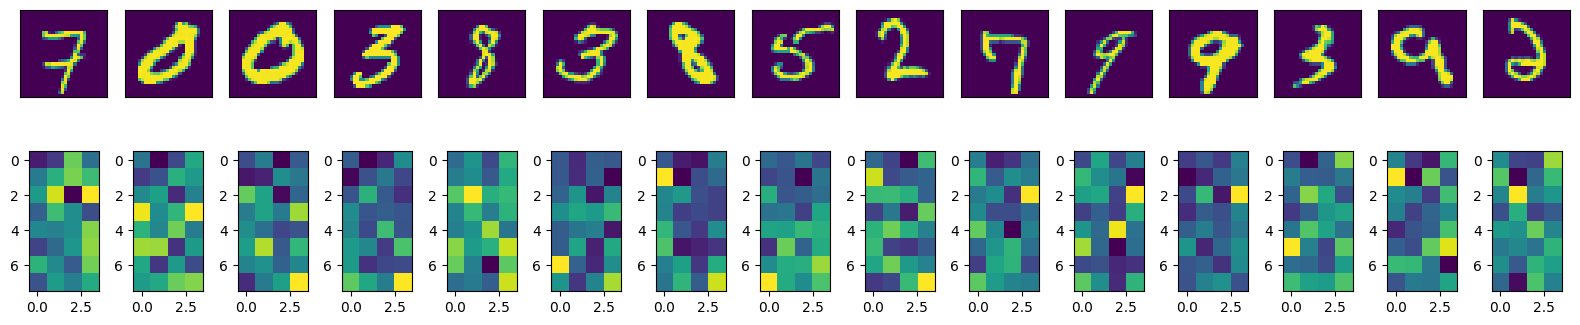

In [46]:
import matplotlib.pyplot as plt
n=15  #Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    #Original image
    ax=plt.subplot(2, n, i+1)
    plt.imshow(flatten_X_labeled_train[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False) #The True default mode has an unsuitable appearance and brings interference in pictures because of their near positions.
    ax.get_yaxis().set_visible(False) #So the false mode was preferred.

    #Encoded feature
    ax=plt.subplot(2, n, i+1+n)
    plt.imshow(encoded_img_labeled_train[i].reshape(8, 4)) 
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

plt.show()

Visualizing the encoded features in comparison to the original ones (test)

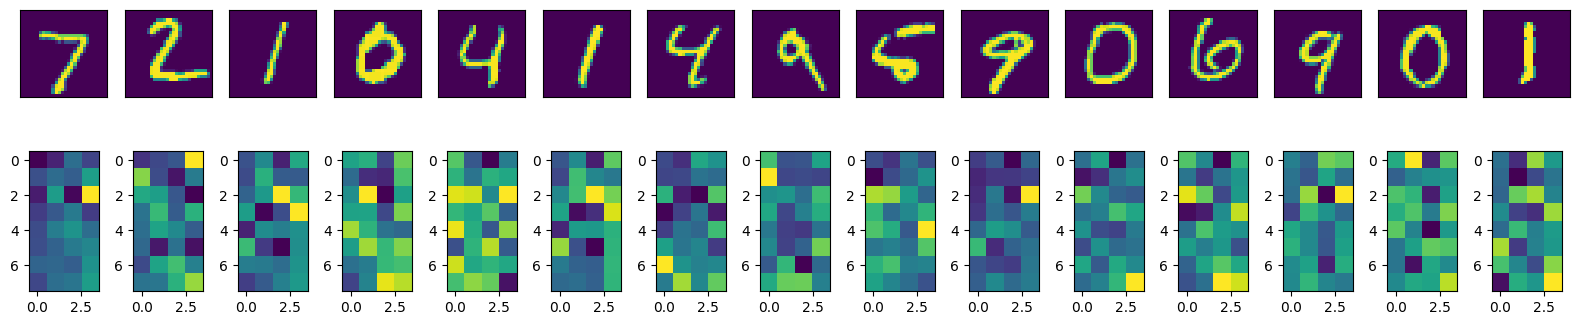

In [47]:
import matplotlib.pyplot as plt

n=15  #Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    #Original image
    ax=plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False) #The True default mode has an unsuitable appearance and brings interference in pictures because of their near positions.
    ax.get_yaxis().set_visible(False) #So the false mode was preferred.

    #Encoded feature
    ax=plt.subplot(2, n, i+1+n)
    plt.imshow(encoded_img_test[i].reshape(8, 4)) 
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

plt.show()

Saving the trained encoder model for future use

In [48]:
encoder.save('encoder.h5')

Discussing the advantages of using autoencoder features for classification tasks

Overally there are several advantages of using autoencoder features for classification tasks:

1. Dimensionality reduction: Autoencoders can reduce the dimensionality of the input data, which can help to reduce overfitting and improve the performance of the classification model.

2. Non-linear feature extraction: Autoencoders can learn non-linear transformations of the input data, which can help to capture complex patterns and relationships in the data that may not be captured by linear methods such as what I did here.

3. Unsupervised learning: Autoencoders can be trained on unlabeled data, which can be beneficial in cases where labeled data is scarce or expensive to obtain. The encoded features learned by the autoencoder can then be used as input to a supervised learning algorithm for classification.

4. Robustness to noise: Autoencoders can learn robust representations of the input data that are less sensitive to noise and other forms of variability in the data. This can help to improve the generalization performance of the classification model.

#My last run result of learning rate was constant same as default of MLP method but the next run as we can see here resulted adaptive and because of it, I prefered to run both of them at last and see which one do better.
Also the same problem happend for activation function which in the last try it was resulted logistic and here we have relu. 

5-fold cross-validation on the labeled data using an MLP classifier

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Defining the parameter grid for hyperparameter tuning
param_grid={
    'hidden_layer_sizes': [50,(25,50)],
    'learning_rate': ['constant', 'adaptive'],
    'activation': ['relu', 'logistic'],
    'batch_size': [16, 32],
    'max_iter': [25, 50],
    }

#Creating the MLP classifier
mlp=MLPClassifier()

#Creating the cross-validation object
cv=KFold(n_splits=5)

#Performing grid search with cross-validation
grid_search=GridSearchCV(mlp, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_search.fit(encoded_img_labeled_train, y_labeled_train)

#Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'activation': 'relu', 'batch_size': 16, 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'max_iter': 50}
Best accuracy:  0.9520555555555555


c:\Users\Amin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


So according to the previous results and their situation, to have a better understanding of what measures of hyperparameters are better ones, another cross validation was done by using more suitable amounts of them. For example for reaching the convergence of optimization, two upper Maximum iterations were chosen (60 and 70 instead of insufficient 50) or after result of 16 for batch size parameter, two other numbers were selected in rear and front for verification. Also same work have been done for hidden layer size.

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Defining the parameter grid for hyperparameter tuning
param_grid={
    'hidden_layer_sizes': [40, 60],
    'learning_rate': ['constant', 'adaptive'],
    'activation': ['relu', 'logistic'],
    'batch_size': [10, 20],
    'max_iter': [60, 70],
    }

#Creating the MLP classifier
mlp=MLPClassifier()

#Creating the cross-validation object
cv=KFold(n_splits=5)

#Performing grid search with cross-validation
grid_search=GridSearchCV(mlp, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_search.fit(encoded_img_labeled_train, y_labeled_train)

#Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'activation': 'relu', 'batch_size': 20, 'hidden_layer_sizes': 60, 'learning_rate': 'adaptive', 'max_iter': 60}
Best accuracy:  0.9538333333333334


c:\Users\Amin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


NOTE: Above result is not so reliable as previous runs and it seems that because of long running times and my laptop lowering of efficiency, because of long power-on time, we see this little problem. The obvious reason is the max iter result which is definitely lower than what it should be. Also it is needed to say that the reason of this repeats in runnings and so the appearing problems is my need to change a few of above parts details which after their changes I needed the subsequent runs. Batch size is also not same as past and best one was 10.

So because of long running time of the code with more amounts of max_iter and hidden_layer_sizes parameters which is needed according to last results, I will choose 100 for hidden_layer_sizes or in other words number of neurons which will be used in this single chosen hidden layer (but it seems that we need a number between 32 and 784 which are the size of the input layer and output one to have better results) but 200 for max_iter in the main modeling because it seems that it is better to have many more iterations, in size of thousands!
So no other crosses will be done.

Training the MLP classifier with the best parameters obtained from cross-validation

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

mlp=MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=100, learning_rate='constant', max_iter=200)
mlp.fit(encoded_img_labeled_train, y_labeled_train)

MLP_y_pred_labeled_train=mlp.predict(encoded_img_labeled_train)
print(confusion_matrix(y_labeled_train, MLP_y_pred_labeled_train))
print("labeled_train_Accuracy:", metrics.accuracy_score(y_labeled_train, MLP_y_pred_labeled_train))

MLP_y_pred_test=mlp.predict(encoded_img_test)
print(confusion_matrix(y_test, MLP_y_pred_test))
print("test_Accuracy:", metrics.accuracy_score(y_test, MLP_y_pred_test))

[[1773    0    1    0    0    0    0    0    1    2]
 [   0 2042    0    0    0    0    0    0    3    1]
 [   4    0 1794    2    1    0    0    2    1    0]
 [   0    0    5 1800    0   19    0    1    6    1]
 [   1    1    0    0 1701    0    1    1    1    9]
 [   0    0    0    1    0 1576    0    0    0    0]
 [   3    0    0    0    0    1 1764    0    1    0]
 [   0    1    0    1    1    1    0 1866    0    3]
 [   1    0    1    6    0    8    1    0 1772    2]
 [   1    0    0    0    7    5    0    7    1 1795]]
labeled_train_Accuracy: 0.9935
[[ 967    0    0    1    0    7    3    1    1    0]
 [   0 1123    4    2    0    1    2    1    2    0]
 [   8    1  990    5    2    2    2   11   11    0]
 [   0    0   16  945    0   20    1    7   12    9]
 [   3    0    3    0  940    3    3    1    1   28]
 [   6    1    1   12    2  859    4    2    3    2]
 [  10    4    1    1    4   10  921    0    7    0]
 [   0    6   10    5    2    3    0  986    3   13]
 [   6    1   

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

mlp=MLPClassifier(activation='relu', batch_size=10, hidden_layer_sizes=100, learning_rate='adaptive', max_iter=200)
mlp.fit(encoded_img_labeled_train, y_labeled_train)

MLP_y_pred_labeled_train=mlp.predict(encoded_img_labeled_train)
print(confusion_matrix(y_labeled_train, MLP_y_pred_labeled_train))
print("labeled_train_Accuracy:", metrics.accuracy_score(y_labeled_train, MLP_y_pred_labeled_train))

MLP_y_pred_test=mlp.predict(encoded_img_test)
print(confusion_matrix(y_test, MLP_y_pred_test))
print("test_Accuracy:", metrics.accuracy_score(y_test, MLP_y_pred_test))

[[1758    0    1    0    0   10    1    0    7    0]
 [   0 2036    0    0    0    1    0    3    5    1]
 [   0    0 1784    1    9    0    0    2    6    2]
 [   0    0    0 1780    0   38    0    1   10    3]
 [   0    1    0    0 1710    0    0    0    0    4]
 [   0    0    0    0    0 1576    0    0    0    1]
 [   7    2    0    0    2   15 1739    0    4    0]
 [   0    0    1    1    2    2    0 1854    2   11]
 [   0    0    0    1    0   13    0    1 1775    1]
 [   0    0    0    3    3    9    0    2    2 1797]]
labeled_train_Accuracy: 0.9893888888888889
[[ 965    0    1    1    0    4    2    2    4    1]
 [   0 1119    4    2    0    0    1    5    4    0]
 [   1    2  990    5    4    1    6    5   16    2]
 [   0    1    6  956    0   33    0    4    4    6]
 [   1    1    2    1  955    2    3    4    0   13]
 [   5    1    0    9    1  864    4    1    3    4]
 [   8    4    0    1   12   19  905    1    7    1]
 [   0    3    8    5    4    1    0  982    2   23]
 [

So as we see as I expected, the first result was relatively better.

Scaling the unlabeled train data for further clustering usage (especially my choice)

In [81]:
scaled_X_unlabeled_train=unlabeled_train.astype('float32')/255

Applying the clustering algorithm to the unlabeled trainig set and labeling them (k-means was selected, the reason for its selection will be explained).

In [82]:
from sklearn.cluster import KMeans
import numpy as np

kmeans=KMeans(n_clusters=10)

kmeans.fit(scaled_X_unlabeled_train)

labels=kmeans.labels_

print("Cluster labels:", labels)


Cluster labels: [1 7 8 ... 4 0 2]


At first because of the size of our data which is relatively large, k-means can be a suitable choice for this clustering. Also we made it flat by scaling and so it is compatible with this usage. 

Before the next parts I should say that we could only concat the X ones with each other (scaled X_ulabeled_train and X_labeled_train) and also y ones (new product of k_means labels and y_labeled_train) and after that use them for our next goal feature extraction and MLP method but according to instructions and for seeing our new dataset, I made it and after that again seperate Xs from ys.

Combining the labels achieved above with its related data

In [95]:
X_unlabeled_train=scaled_X_unlabeled_train.values.reshape((len(scaled_X_unlabeled_train), np.prod(scaled_X_unlabeled_train.shape[1:])))

In [98]:
labels=pd.DataFrame(data=labels,columns=['label'])
secondary_labeled_train=pd.concat([labels,pd.DataFrame(X_unlabeled_train)], axis = 1)
print(secondary_labeled_train)

       label    0    1    2    3    4    5    6    7    8  ...  774  775  776  \
0          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1          7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2          8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4          4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
41995      8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41996      2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41997      4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41998      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41999      2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  

combining scaled X_labeled_train with y_labeled_train for further new training dataset creation

In [99]:
labeled_train=pd.concat([pd.DataFrame(y_labeled_train),pd.DataFrame(X_labeled_train)], axis = 1)
print(labeled_train)

       label    0    1    2    3    4    5    6    7    8  ...  774  775  776  \
0          7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3          3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4          8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
17995      3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17996      8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17997      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17998      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17999      4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  

Combining the previous labeled train with newly built labeled clusters to create a new training dataset

In [100]:
new_training_dataset=pd.concat([labeled_train, secondary_labeled_train])
print(new_training_dataset)

       label    0    1    2    3    4    5    6    7    8  ...  774  775  776  \
0          7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3          3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4          8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
41995      8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41996      2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41997      4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41998      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41999      2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  

Separating X_train and y_train from new_training_dataset

In [101]:
X_new_training_dataset=new_training_dataset.loc[:, new_training_dataset.columns != 'label']
y_new_training_dataset=new_training_dataset['label']

print(X_new_training_dataset, y_new_training_dataset)

       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
41995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
41999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  781  782  783  
0      0

Feature extraction by encoder part of previous modeled autoencoder on new dataset before secondary MLP

NOTE: Feature extraction for test data was performed again to see if it is improved for MLP usage.

In [103]:
encoded_new_training_dataset=encoder.predict(X_new_training_dataset)
new_encoded_test=encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Applying MLP method on new dataset by its new extracted features and check the accuracy and confusion matrix (also a new view on test results)

In [105]:
mlp.fit(encoded_new_training_dataset, y_new_training_dataset)

MLP_y_pred_new_training_dataset=mlp.predict(encoded_new_training_dataset)
print(confusion_matrix(y_new_training_dataset, MLP_y_pred_new_training_dataset))
print("new_train_dataset_Accuracy:", metrics.accuracy_score(y_new_training_dataset, MLP_y_pred_new_training_dataset))

MLP_y_pred_test_secondary=mlp.predict(new_encoded_test)
print(confusion_matrix(y_test, MLP_y_pred_test_secondary))
print("test_Accuracy:", metrics.accuracy_score(y_test, MLP_y_pred_test_secondary))

[[3734  141   45  885   41   28  197   96  128  673]
 [1076 5961   49   18  147  717   20  217   65   84]
 [  95  100 5335    8 1223  181   49  295  171  484]
 [ 151   75    7 2140   41   20   47 1149  328   37]
 [  33  907  762   40 2962   90   69   12   52   11]
 [  39  594   85   27   50 3463  170  518  458   78]
 [  36   51   43   21   39   25 5558   16   32   16]
 [  94  477 1072  110   20  161   15 4850  215    8]
 [  47   73   38   73   14  251   47  329 5465   25]
 [ 197  861  499   71   14   56   61   43   58 2241]]
new_train_dataset_Accuracy: 0.69515
[[ 81   3   1 437   1   3  27  37  17 373]
 [641 154   1   0   1 331   4   1   2   0]
 [ 41  32  80   5 657  62  31  69  43  12]
 [ 45  17   9  77  26   5   3 681 140   7]
 [ 20 550 301   0  46  33  27   0   1   4]
 [ 15  39  26   9   1 228  29 274 236  35]
 [ 14  18   0   8   8   7 885   1  11   6]
 [ 53 263 557   0   8  50   0  92   2   3]
 [ 17  26  23   8   2  18  13 155 702  10]
 [ 27 509 268   5   1  11   3   9  15 161]]
te

As we can see, the accuracy of both training set and test one dropped significantly (especially the test one) and their confusion matrix literally confused! Means that despite of previous well done ones, the distribution of numbers ,especially the larger or bigger ones, in all regions of the squares increased and their natural focus on the diagonal diameter decreased substantially. So when we investigate the new situation and data for the cause, the main one which comes to our mind is combining of classified labeled data with clustering labeled one. As we know the method of these two kinds of grouping data are relatively different, this idea can't be considered so useful and worthy. The next notable point to say is the difference in the size of the data. Maybe we can say that after encountering with this larger size of data, our model's ability to identify the best groupings decreased and data didn't bring them any new touchable thing to improve or for analysis.